Bueno, pongámonos serios y hagamos de este dataset un buen objetivo para hacer una regresión lineal, para lograr una buena predicción tenemos que ser conscientes de lo que hacemos con nuestro dataset, para eso debemos hacer un preprocesamiento, de forma que nuestro modelo predictivo sea lo más exacto posible.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("housing_Melbourne_big.csv")
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df['Price'].isna().sum() 

np.int64(7610)

Notemos que los valores perdidos suman un 27% del total de datos, como es muy difícil obtener los precios de dichas propiedades,(no podemos viajar hasta Australia para hacer por nosotros mismos el senso jsjsjs) decidimos que lo mejor sería eliminar dichos datos de la tabla

In [4]:
df['Price'].isna().sum()/df['Price'].count() 

np.float64(0.27929680331779644)

In [5]:
df.dropna(how='any', subset=['Price'],inplace = True) 

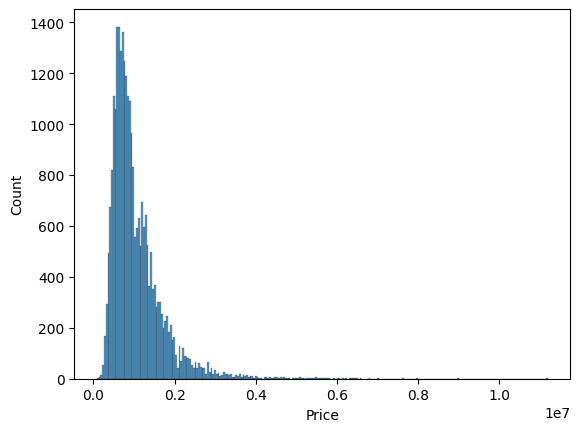

In [6]:
sns.histplot(df['Price'])
plt.show()

También decidimos convertir las siguientes variables en categorías en vez de objetos generales o numéricos para así poder sacar más provecho de cada una

In [7]:

print(df.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [8]:
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    df[colname] = df[colname].astype('category') 
    
num_cats = ['Postcode']  

for colname in num_cats:
    df[colname] = df[colname].astype('category')   
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  int64   
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  object  
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  category
 10  Bedroom2       20806 non-null  float64 
 11  Bathroom       20800 non-null  float64 
 12  Car            20423 non-null  float64 
 13  Landsize       17982 non-null  float64 
 14  BuildingArea   10656 non-null  float64 
 15  YearBuilt      12084 non-null  float64 
 16  CouncilArea    27244 non-null  category
 17  Lattitude      20993 non-null  float

Limpiemos esta columna un poco también, solo nos interesa el nombre, lo demás puede desecharse

In [9]:
df['Address']

1            85 Turner St
2         25 Bloomburg St
4            5 Charles St
5        40 Federation La
6             55a Park St
               ...       
34852         13 Burns St
34853       29A Murray St
34854      147A Severn St
34855    12/37 Stephen St
34856    3 Tarrengower St
Name: Address, Length: 27247, dtype: category
Categories (26751, object): ['1 Aberfeldie Wy', '1 Acheron Av', '1 Adelle Ct', '1 Airlie St', ..., '9a The Crossway', '9b Latham St', '9b Marquis Rd', '9b Stewart St']

In [10]:
new = df["Address"].str.split(" ", n = 1, expand = True) 
new

,0,1
1,85,Turner St
2,25,Bloomburg St
4,5,Charles St
5,40,Federation La
6,55a,Park St
...,...,...
34852,13,Burns St
34853,29A,Murray St
34854,147A,Severn St
34855,12/37,Stephen St


In [11]:
df["HouseNum"]= new[0] 
df["StreetName"]= new[1] 
df.drop(columns =["Address",'HouseNum'], inplace = True) 
df 

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,StreetName
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,Turner St
2,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,Bloomburg St
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,Charles St
5,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,Federation La
6,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,Park St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,Burns St
34853,Yarraville,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,Murray St
34854,Yarraville,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,Severn St
34855,Yarraville,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,Stephen St


In [12]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

Ahora removamos los valores atípicos o mejor conocidos como ´outliners´ que no son más que una observación que es numéricamente distante del resto de los demás datos, pero que puede afectar negativamente el rendimiento de nuestro modelo

Por ejemplo aquí podemos apreciar como estas 2 casas a pesar de ser muy similares en cuanto a sus características, la '19583' vale casi 10 veces lo que la '28920',
esto posiblemente se deba a un error a la hora de transcribir los datos, pero ese valor anormalmente grande puede afectar nuestro modelo, por lo que lo retiraremos.

In [13]:
df[(df['Regionname'] == 'South-Eastern Metropolitan') & (df['StreetName'] == 'Bevis St')].sort_values(by=['Price'],ascending=False)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,StreetName
19583,Mulgrave,3,h,9000000.0,PI,Hall,2017-07-29,18.8,3170.0,3.0,...,1.0,744.0,117.0,1960.0,Monash City Council,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,Bevis St
28920,Mulgrave,4,h,960000.0,S,Win,2017-11-25,18.8,3170.0,4.0,...,1.0,NaN,NaN,NaN,Monash City Council,-37.92960,145.16180,South-Eastern Metropolitan,7113.0,Bevis St


In [14]:
df.drop([19583], inplace = True)

Aquí sucede algo parecido, el precio de la casa '25635' parece ser un valor atípico, aunque su landsize es mayor que el resto, su precio que duplica al 2do más caro no es coherente con el resto de información, así que también lo eliminaremos

In [15]:
df[(df['Regionname'] == 'Southern Metropolitan') & (df['StreetName'] == 'Cole St')].sort_values(by=['Price'],ascending=False)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,StreetName
25635,Brighton,4,h,11200000.0,VB,hockingstuart,2017-10-28,10.5,3186.0,4.0,...,2.0,1400.0,NaN,NaN,Bayside City Council,-37.89335,144.98643,Southern Metropolitan,10579.0,Cole St
19815,Brighton,5,h,5500000.0,VB,Marshall,2017-09-03,10.5,3186.0,5.0,...,2.0,830.0,NaN,NaN,Bayside City Council,-37.89544,145.00279,Southern Metropolitan,10579.0,Cole St
29305,Brighton,4,h,5500000.0,S,Marshall,2018-01-06,10.5,3186.0,4.0,...,2.0,NaN,NaN,NaN,Bayside City Council,-37.89384,144.98711,Southern Metropolitan,10579.0,Cole St
34011,Brighton,4,h,2710000.0,S,Biggin,2018-02-24,10.5,3186.0,4.0,...,2.0,547.0,216.0,1905.0,Bayside City Council,-37.89538,145.00121,Southern Metropolitan,10579.0,Cole St
1777,Brighton,4,h,2145000.0,S,Buxton,2016-05-07,11.2,3186.0,3.0,...,1.0,550.0,197.0,1910.0,Bayside City Council,-37.89540,145.00170,Southern Metropolitan,10579.0,Cole St
1767,Brighton,4,h,1761000.0,S,Kay,2016-08-06,11.2,3186.0,4.0,...,3.0,615.0,135.0,1920.0,Bayside City Council,-37.89560,145.00260,Southern Metropolitan,10579.0,Cole St
1749,Brighton,2,u,1300000.0,S,hockingstuart,2017-03-04,11.2,3186.0,2.0,...,1.0,244.0,NaN,2000.0,Bayside City Council,-37.89540,145.00260,Southern Metropolitan,10579.0,Cole St


In [16]:
df.drop([25635], inplace = True)

Aquí pasa lo mismo, la primera propiedad triplica el precio de la 2da sin razón alguna

In [17]:
df[(df['Regionname'] == 'Northern Metropolitan') & (df['StreetName'] == 'St Kilda Rd')].sort_values(by=['Price','Date'],ascending=False)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,StreetName
25204,Melbourne,3,u,6500000.0,VB,Sotheby's,2017-10-21,0.0,3000.0,NaN,...,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,17496.0,St Kilda Rd
27145,Melbourne,3,u,2250000.0,S,Gary,2017-11-11,0.0,3000.0,NaN,...,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,17496.0,St Kilda Rd
6654,Melbourne,2,u,2138000.0,S,Rodney,2016-06-04,2.8,3000.0,NaN,...,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,17496.0,St Kilda Rd
6655,Melbourne,3,u,2030000.0,S,Marshall,2016-06-04,2.8,3000.0,NaN,...,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,17496.0,St Kilda Rd
29682,Melbourne,3,u,1825000.0,SP,Gary,2018-01-06,0.0,3000.0,NaN,...,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,17496.0,St Kilda Rd
6649,Melbourne,3,u,1525000.0,S,Marshall,2017-03-04,2.8,3000.0,NaN,...,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,17496.0,St Kilda Rd
6730,Melbourne,3,u,1505000.0,S,RT,2016-09-24,2.8,3000.0,NaN,...,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,17496.0,St Kilda Rd
6670,Melbourne,3,u,1470000.0,VB,Nelson,2016-11-07,2.8,3000.0,NaN,...,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,17496.0,St Kilda Rd
6714,Melbourne,3,u,1400000.0,PI,Marshall,2016-06-18,2.8,3000.0,NaN,...,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,17496.0,St Kilda Rd
6663,Melbourne,3,u,1275000.0,S,Jellis,2016-05-07,2.8,3000.0,NaN,...,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,17496.0,St Kilda Rd


In [18]:
df.drop([25204], inplace = True)

Otra cosa que decidimos tener en cuenta son las variables duplicadas, notemos como tanto Rooms como Bedroom2 tienen los mismos datos, en muchos casos por no decir que practicamente todos, por lo que la diferencia al ser mínima decidimos que era mejor quitar la columna Bedroom2, ya que mas que brindar información, duplicaba la que ya teníamos

In [19]:
df[['Rooms','Bedroom2']]

,Rooms,Bedroom2
1,2,2.0
2,2,2.0
4,3,3.0
5,3,3.0
6,4,3.0
...,...,...
34852,4,4.0
34853,2,2.0
34854,2,2.0
34855,3,NaN


In [20]:
df = df.drop(['Bedroom2'],axis=1)

Ahora notemos que 'Date' contiene las fechas de cuando fueron creadas las casas, es mejor convertir esto en un nuevo feature que en dependencia de la edad de la casa te diga si es histórica o contemporánea

In [21]:
df.Date.sort_values(ascending=False)

33403   2018-03-17
33577   2018-03-17
33563   2018-03-17
33565   2018-03-17
33567   2018-03-17
           ...    
9676    2016-02-04
2516    2016-02-04
2       2016-02-04
10128   2016-01-28
10127   2016-01-28
Name: Date, Length: 27244, dtype: datetime64[ns]

In [22]:
df['Age'] = 2019 - df['YearBuilt']
df['Historic'] = np.where(df['Age']>=50,'Historic','Contemporary')
df['Historic'] = df['Historic'].astype('category')

In [23]:
df[['Age','Historic']]

,Age,Historic
1,NaN,Contemporary
2,119.0,Historic
4,119.0,Historic
5,NaN,Contemporary
6,5.0,Contemporary
...,...,...
34852,NaN,Contemporary
34853,1.0,Contemporary
34854,19.0,Contemporary
34855,NaN,Contemporary


Creamos otro feature 'Location'

In [24]:
df['Location']= df["Suburb"].astype(str) +", "+ df["StreetName"] 
df['Location'] = df['Location'].astype('category')

Veamos ahora que hacer con nuestros datos nulos

aquí vemos cuántos datos perdidos tenemos y su porcentaje

In [25]:
df.isnull().sum() 

Suburb               0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          6446
Car               6823
Landsize          9264
BuildingArea     16589
YearBuilt        15161
CouncilArea          3
Lattitude         6253
Longtitude        6253
Regionname           3
Propertycount        3
StreetName           0
Age              15161
Historic             0
Location             0
dtype: int64

In [26]:
df.isnull().sum()/len(df)*100

Suburb            0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.003671
Postcode          0.003671
Bathroom         23.660255
Car              25.044046
Landsize         34.003817
BuildingArea     60.890471
YearBuilt        55.648950
CouncilArea       0.011012
Lattitude        22.951843
Longtitude       22.951843
Regionname        0.011012
Propertycount     0.011012
StreetName        0.000000
Age              55.648950
Historic          0.000000
Location          0.000000
dtype: float64

In [27]:
df = df.dropna()

Aquí notemos también como hay casas con BuildingArea igual a 0, esto definitivamente es un error, así que es mejor eliminarlas

In [28]:
df[df['BuildingArea']==0]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,StreetName,Age,Historic,Location
7211,North Melbourne,2,t,841000.0,S,Jellis,2017-03-04,2.3,3051.0,1.0,...,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0,Shands La,19.0,Contemporary,"North Melbourne, Shands La"
19775,Balwyn North,5,h,1950000.0,S,RT,2017-09-03,9.7,3104.0,3.0,...,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0,Wanbrow Av,70.0,Historic,"Balwyn North, Wanbrow Av"
19840,Bundoora,3,h,814000.0,S,Barry,2017-09-03,12.1,3083.0,1.0,...,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0,Moreton Cr,49.0,Contemporary,"Bundoora, Moreton Cr"
20223,Roxburgh Park,4,h,570000.0,S,Raine,2017-09-03,20.6,3064.0,2.0,...,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan,5833.0,Sandover Dr,19.0,Contemporary,"Roxburgh Park, Sandover Dr"
20262,Thornbury,3,t,900000.0,VB,Jellis,2017-09-03,7.0,3071.0,2.0,...,2000.0,Darebin City Council,-37.76343,145.02096,Northern Metropolitan,8870.0,Station St,19.0,Contemporary,"Thornbury, Station St"
22040,Prahran,3,h,1390000.0,S,Marshall,2017-08-19,4.6,3181.0,2.0,...,2002.0,Stonnington City Council,-37.85257,145.00296,Southern Metropolitan,7717.0,Aberdeen Rd,17.0,Contemporary,"Prahran, Aberdeen Rd"
22507,Huntingdale,3,h,1205000.0,SA,FN,2017-09-23,12.3,3166.0,2.0,...,1960.0,Monash City Council,-37.90823,145.10851,Southern Metropolitan,768.0,Beauford St,59.0,Historic,"Huntingdale, Beauford St"
22931,Balwyn North,5,h,2800000.0,S,Marshall,2017-08-26,9.7,3104.0,2.0,...,1960.0,Boroondara City Council,-37.80385,145.09094,Southern Metropolitan,7809.0,Hosken St,59.0,Historic,"Balwyn North, Hosken St"
22994,Brighton East,3,h,1650000.0,SP,Buxton,2017-08-26,10.3,3187.0,2.0,...,1920.0,Bayside City Council,-37.92698,145.02673,Southern Metropolitan,6938.0,Cummins Rd,99.0,Historic,"Brighton East, Cummins Rd"
23022,Bundoora,4,h,815000.0,S,Ray,2017-08-26,12.1,3083.0,2.0,...,1965.0,Banyule City Council,-37.70765,145.05556,Northern Metropolitan,10175.0,Greenwood Dr,54.0,Historic,"Bundoora, Greenwood Dr"


In [29]:
df = df[df['BuildingArea']!=0]

Ahora notemos una última cosa, para ello primero creamos una nueva columna que será el área por habitación

In [30]:
df['AreaPerRoom'] = df['BuildingArea']/df['Rooms']

In [31]:
df.sort_values(by = 'AreaPerRoom').head(50)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,StreetName,Age,Historic,Location,AreaPerRoom
19274,Balwyn,5,h,3812000.0,S,VICProp,2017-07-29,7.9,3103.0,4.0,...,Boroondara City Council,-37.80600,145.09511,Southern Metropolitan,5682.0,Burroughs Rd,7.0,Contemporary,"Balwyn, Burroughs Rd",0.200000
19298,Boronia,4,h,770000.0,SP,Noel,2017-07-29,25.0,3155.0,2.0,...,Knox City Council,-37.84760,145.29493,Eastern Metropolitan,9704.0,New St,49.0,Contemporary,"Boronia, New St",0.250000
18833,Ashwood,3,t,1060000.0,S,Buxton,2017-07-22,10.2,3147.0,2.0,...,Monash City Council,-37.86324,145.10289,Southern Metropolitan,2894.0,Vannam Dr,19.0,Contemporary,"Ashwood, Vannam Dr",0.333333
13553,Reservoir,3,t,815000.0,S,Barry,2017-04-08,11.2,3073.0,2.0,...,Darebin City Council,-37.70850,145.01800,Northern Metropolitan,21650.0,Rathcown Rd,7.0,Contemporary,"Reservoir, Rathcown Rd",0.333333
13586,Reservoir,2,u,505000.0,S,RW,2017-04-29,11.2,3073.0,1.0,...,Darebin City Council,-37.72160,145.00990,Northern Metropolitan,21650.0,Thackeray Rd,59.0,Historic,"Reservoir, Thackeray Rd",0.500000
19343,Camberwell,2,u,600800.0,S,Philip,2017-07-29,7.7,3124.0,1.0,...,Boroondara City Council,-37.84237,145.09257,Southern Metropolitan,8920.0,Thomas St,59.0,Historic,"Camberwell, Thomas St",0.500000
7269,North Melbourne,2,u,587134.0,SP,Woodards,2016-08-28,2.3,3051.0,1.0,...,Melbourne City Council,-37.79760,144.94540,Northern Metropolitan,6821.0,Wood St,49.0,Contemporary,"North Melbourne, Wood St",0.500000
19474,Glen Iris,2,t,955000.0,S,Jellis,2017-07-29,7.3,3146.0,1.0,...,Boroondara City Council,-37.85448,145.04850,Southern Metropolitan,10412.0,Malvern Rd,49.0,Contemporary,"Glen Iris, Malvern Rd",0.500000
29534,Glenroy,2,t,530000.0,S,Stockdale,2018-01-06,11.2,3046.0,1.0,...,Moreland City Council,-37.70017,144.92648,Northern Metropolitan,8870.0,Beatty Av,9.0,Contemporary,"Glenroy, Beatty Av",0.500000
8787,Richmond,1,u,342000.0,S,Jellis,2016-09-10,2.6,3121.0,1.0,...,Yarra City Council,-37.82140,144.98960,Northern Metropolitan,14949.0,Punt Rd,49.0,Contemporary,"Richmond, Punt Rd",1.000000


Notemos como existen habitaciones con un área <= $1m^2$, consideraremos estos casos como valores atípicos y los quitaremos

In [32]:
df = df[df['AreaPerRoom'] >1.5]

Veamos ahora que tal nos quedó todo

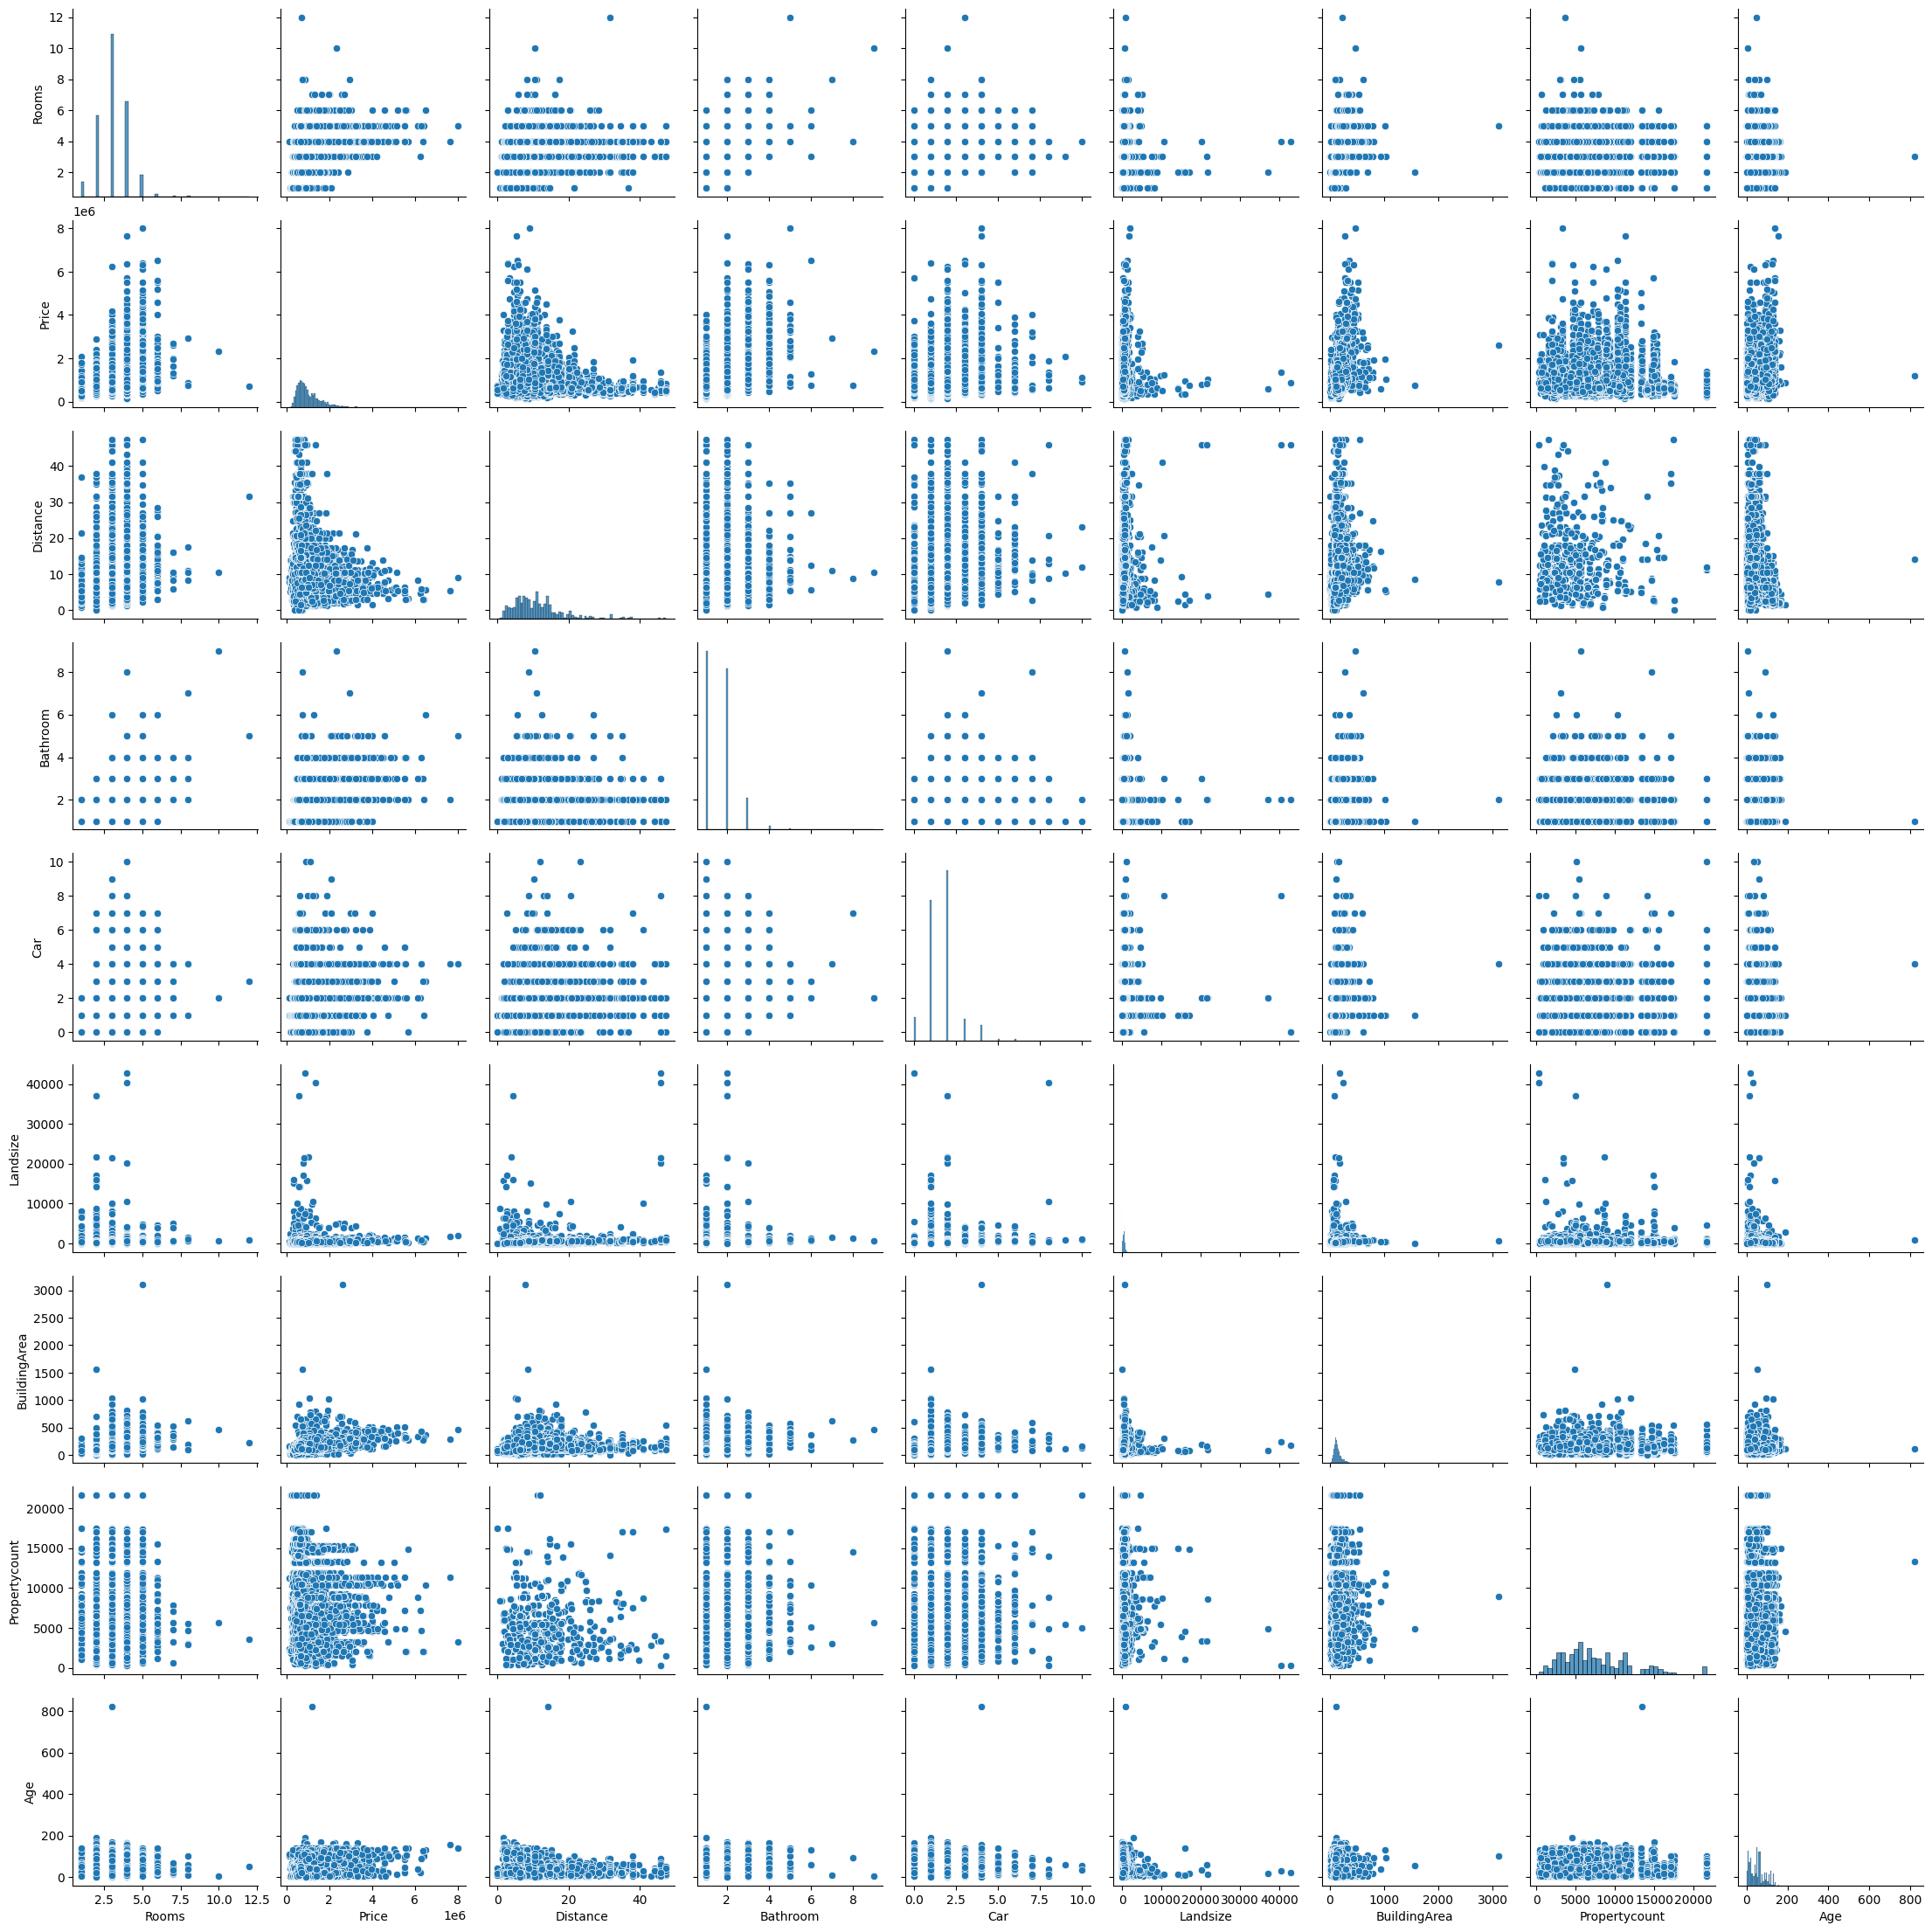

In [33]:
sns.pairplot(df,vars= ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize','BuildingArea',  'Propertycount','Age'], palette = 'viridis')
plt.show()

<Axes: xlabel='Rooms', ylabel='Price'>

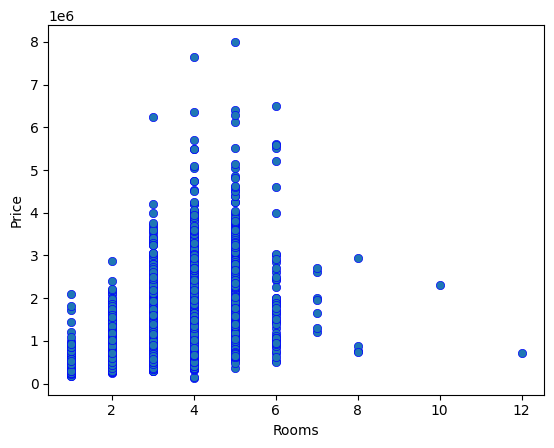

In [34]:
sns.scatterplot(x = 'Rooms', y = 'Price', data = df, edgecolor = 'b')

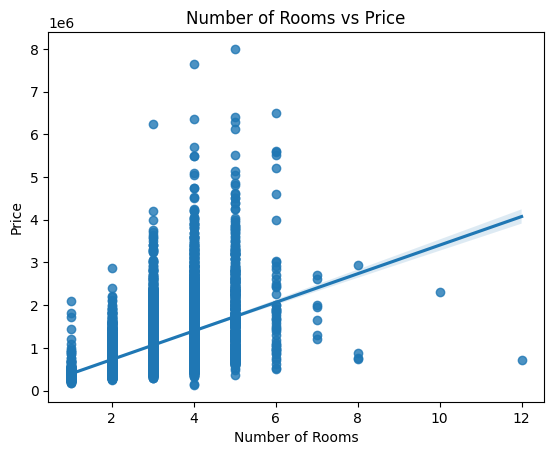

In [35]:
sns.regplot(x='Rooms',y='Price',data=df)
plt.title("Number of Rooms vs Price") #Add plot title
plt.ylabel("Price") #Adjust the label of the y-axis
plt.xlabel("Number of Rooms") 
plt.show()

#### Hagamos nuestro modelito entonces

In [36]:
df.drop(columns=['Suburb','Method', 'Postcode', 
       'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 
       'Propertycount','AreaPerRoom','StreetName'], inplace = True)

In [37]:
df['Type'] = df['Type'].map({'u':0,'t':1,'h':2}).astype('int')

In [38]:
df = pd.get_dummies(df, columns=['Regionname','Historic'],dtype='int')

In [39]:
X1 = df.drop(['Price','SellerG', 'Date','Location'], axis=1)

y1 = df['Price']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = .20, random_state= 0)

In [40]:
lm_regressor = LinearRegression().fit(X1_train,y1_train)


In [41]:
y_pred = lm_regressor.predict(X1_test)

In [42]:
print('MAE:',metrics.mean_absolute_error(y1_test,y_pred))
print('MSE:',metrics.mean_squared_error(y1_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y1_test,y_pred)))

MAE: 260072.9916548535
MSE: 160429235151.2173
RMSE: 400536.184571653


In [43]:
lm_regressor.score(X1_test, y1_test)

0.6721523002678519

Obtuvimos un 67.21% de efectividad, definitivamente sirvió de algo todo lo que hicimos, mejoramos poco más de un 11% el resultado que ya teníamos, si bien la regresión lineal no es lo más usado para este tipo de predicciones, logramos un buen resultado.

Estábamos listos para entregar el trabajo ya a nuestro cliente, lo llamamos y le comentamos todo lo que habíamos hecho y quedó muy encantado con el modelo predictivo que le hicimos, tanto que nos dijo que como al final Trump había ganado las elecciones, podía volver a valorar la opción de California para vivir, así que nos pidió que le hiciésemos un modelito predicitivo para ese dataset también, aunque aceptó que estaba muy convencido ya de ir a vivir a Australia, pq entre nuestro trabajo y el dato de que allá podía tener un canguro como mascota estaba muy contento con Melbourne, pero bueno, nos iba a dar un plus si hacíamos el modelo para California también, así que manos a la obra